### Ejemplos tomados de un tutorial de sklearn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.rcParams['figure.figsize'] = (20, 10)
pd.set_option('display.max_columns', None)

In [3]:
import sklearn
from sklearn import datasets
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

In [6]:
df = pd.read_csv("train.csv")

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df.Parch.describe()

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64

In [9]:
df["Survived"].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [ ]:
import matplotlib.gridspec as gridspec
features=["Pclass","Age", "Fare", "Parch"]
nplots=np.size(features)
plt.figure(figsize=(15,4*nplots))
gs = gridspec.GridSpec(nplots,1)
for i, feat in enumerate(features):
    ax = plt.subplot(gs[i])
    sns.distplot(df[feat][df.Survived==0], bins=30)
    sns.distplot(df[feat][df.Survived==1],bins=30)
    ax.legend(['Survived 0', 'Survived 1'],loc='best')
    ax.set_xlabel('')
    ax.set_title('Distribución de: ' + feat)

In [10]:
X = df[["Pclass","Age", "Fare", "Parch"]]
y = df["Survived"]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [12]:
X_train = X_train.fillna(3)
X_test = X_test.fillna(30)

In [13]:
multi_log = linear_model.LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, max_iter=150,
                   multi_class='ovr', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
multi_log.fit(X_train, y_train)

LogisticRegression(C=100.0, max_iter=150, multi_class='ovr', n_jobs=-1)

In [15]:
y_pred = multi_log.predict(X_test)

In [16]:
y_pred_p = multi_log.predict_proba(X_test)

In [17]:
print("Y el accuracy es:",
metrics.accuracy_score(y_test, y_pred)*100)

Y el accuracy es: 67.0391061452514


In [ ]:
import matplotlib.pyplot as plt
plt.hist(y_pred_p)
plt.show()

In [18]:

matriz_confusion = metrics.confusion_matrix(y_test, y_pred)
matriz_confusion

array([[90, 16],
       [43, 30]])

In [20]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.6703910614525139
Precision: 0.6521739130434783
Recall: 0.410958904109589


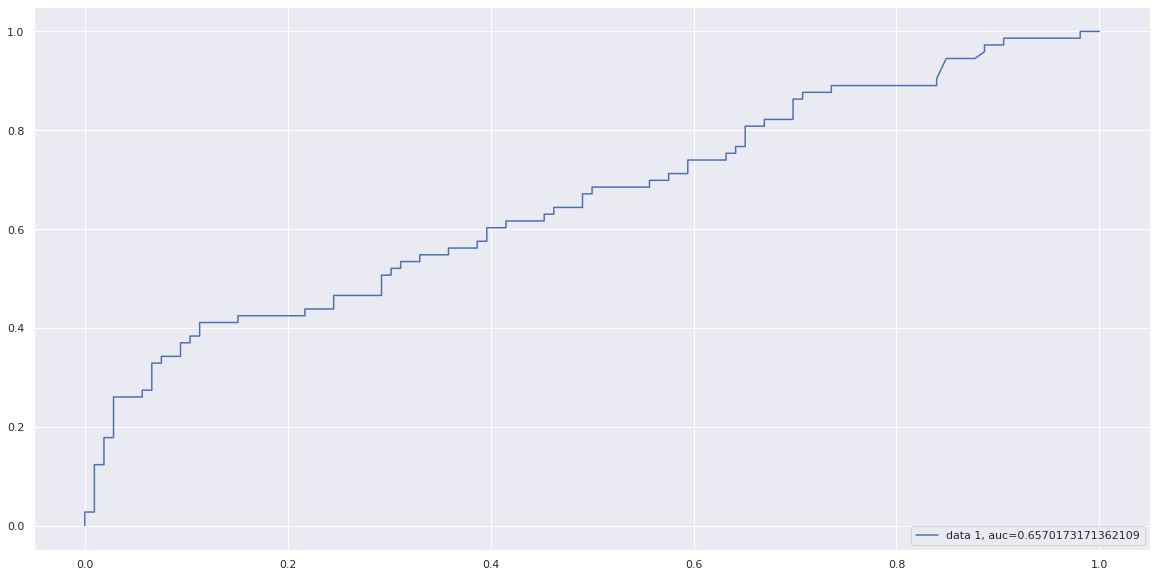

In [19]:
y_pred_proba = multi_log.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## Ahora intentamos algo más...

In [22]:
corr_m = df[features+ ["Survived"]].corr()

In [23]:
corr_m["Survived"].sort_values(ascending=False)

Survived    1.000000
Fare        0.257307
Parch       0.081629
Age        -0.077221
Pclass     -0.338481
Name: Survived, dtype: float64

In [21]:

sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

In [22]:
clf = LogisticRegression(random_state=20200611,max_iter=200)
model_res = clf.fit(X_train_res, y_train_res)

In [23]:
print(classification_report(model_res.predict(X_test), y_test))

              precision    recall  f1-score   support

           0       0.71      0.69      0.70       109
           1       0.53      0.56      0.55        70

    accuracy                           0.64       179
   macro avg       0.62      0.62      0.62       179
weighted avg       0.64      0.64      0.64       179



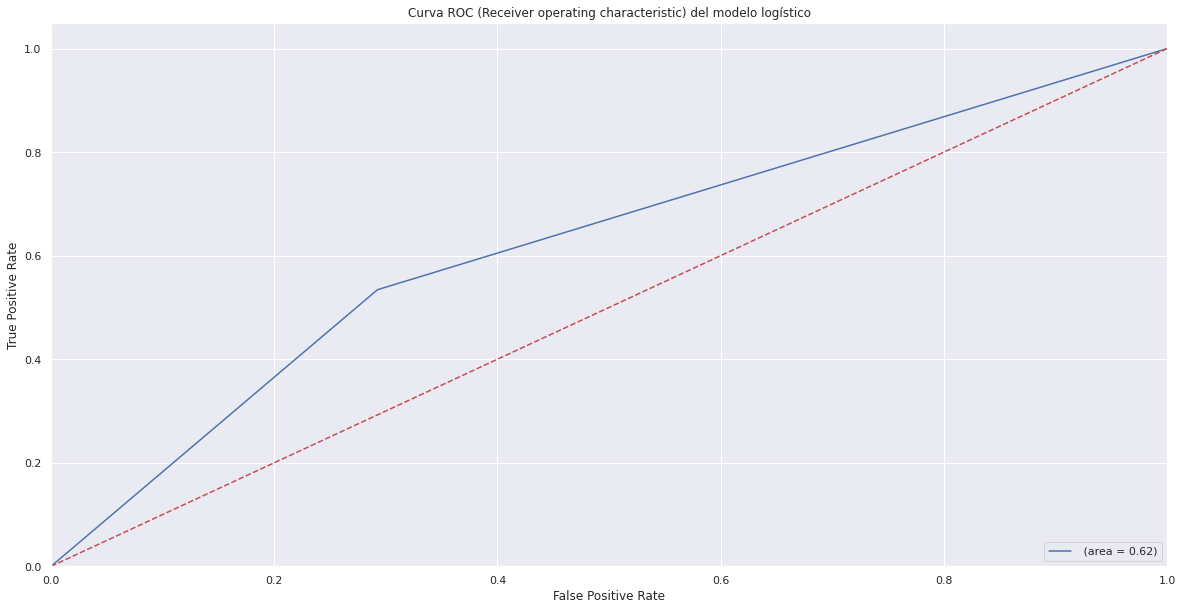

0.6208968725768932


In [24]:
probs = model_res.predict(X_test)
preds = probs#[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=' (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC (Receiver operating characteristic) del modelo logístico')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
print(roc_auc)